## Milestone Project Food 101 Vision Big

## Check GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2a23d9c9-f138-762d-4a83-60724f264c11)


In [ ]:

!pip install -U -q tf-nightly

# Check TensorFlow version (should be minimum 2.4.0+ but 2.13.0+ is better)
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.8/656.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
TensorFlow version: 2.20.0-dev20250320
Notebook last run (end-to-end): 2025-03-21 15:20:59.942477


In [ ]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")


--2025-03-21 15:20:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-03-21 15:21:00 (88.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys


In [ ]:
# Get TensorFlow datasets
import tensorflow_datasets as tfds

In [ ]:
# List all available datasets
datasets_list = tfds.list_builders()
print(datasets_list)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asimov_dilemmas_auto_val', 'asimov_dilemmas_scifi_train', 'asimov_dilemmas_scifi_val', 'asimov_injury_val', 'asimov_multimodal_auto_val', 'asimov_multimodal_manual_val', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'b

In [ ]:
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train','validation'],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.7S8I8Z_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.7S8I8Z_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
# Get the classnames
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## Exploring the food101 data from tfds

To become one with our data we want to find
* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded?)
* Do the labels match up with the class names?


In [ ]:
# Take one sample of our training data
for image, label in train_data.take(1):
  print(f" Image shape: {image.shape} \nImage datatype: {image.dtype}, \nTarget class from Food101 (tesnor form): {label}, \nClass name (str form): {class_names[label.numpy()]}")

 Image shape: (512, 512, 3) 
Image datatype: <dtype: 'uint8'>, 
Target class from Food101 (tesnor form): 64, 
Class name (str form): miso_soup


In [ ]:
# What does our image tensor look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 43,  89, 125],
        [ 52,  96, 131],
        [ 85, 128, 162],
        ...,
        [251, 254, 223],
        [250, 253, 222],
        [250, 253, 222]],

       [[ 42,  88, 124],
        [ 53,  97, 132],
        [ 92, 135, 169],
        ...,
        [251, 254, 223],
        [250, 253, 222],
        [250, 253, 222]],

       [[ 45,  89, 124],
        [ 52,  96, 131],
        [ 92, 135, 169],
        ...,
        [251, 254, 223],
        [250, 253, 222],
        [250, 253, 222]],

       ...,

       [[ 91,  99,  86],
        [ 89,  97,  84],
        [ 88,  94,  82],
        ...,
        [ 37,  44,  50],
        [ 34,  41,  47],
        [ 31,  38,  44]],

       [[ 91,  99,  86],
        [ 90,  98,  85],
        [ 88,  96,  83],
        ...,
        [ 38,  43,  47],
        [ 35,  40,  44],
        [ 33,  38,  42]],

       [[ 93, 101,  88],
        [ 93, 101,  88],
        [ 89,  97,  84],
        ...,
        [ 37,  42,  4

In [ ]:
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## Plot an image for tensorflow datasets

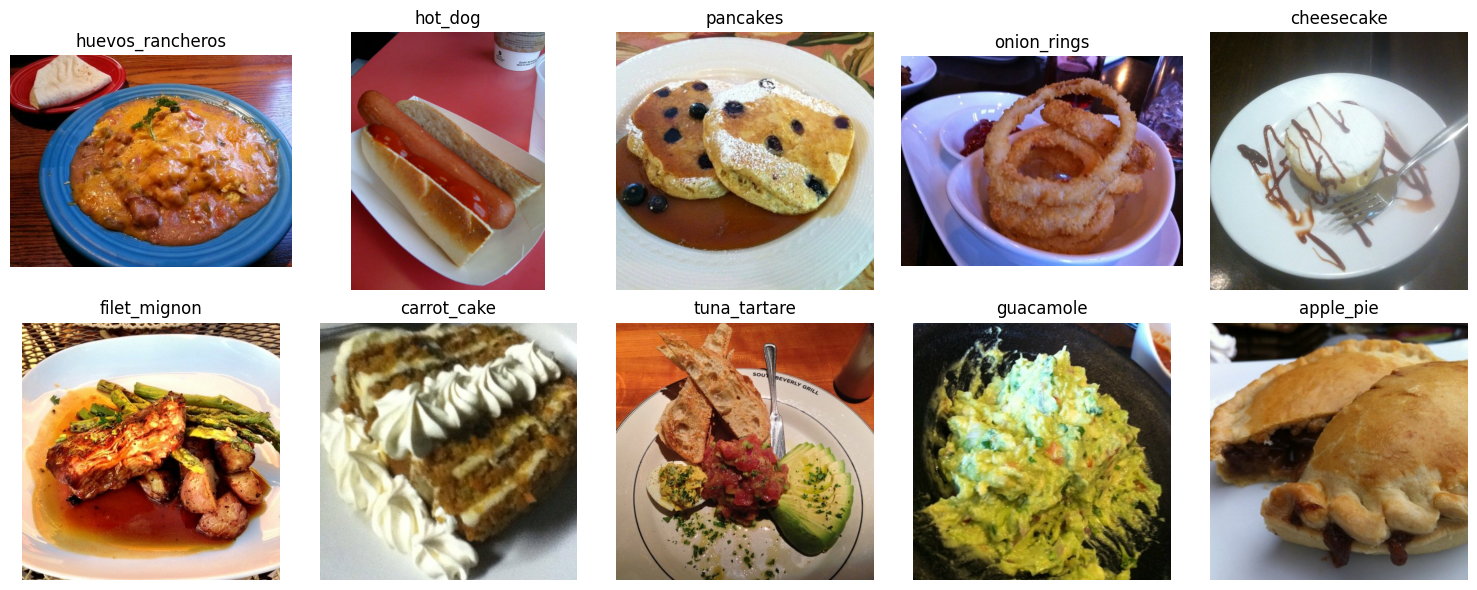

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 10 subplots (2 rows, 5 columns)
plt.figure(figsize=(15, 6))  # Adjust figure size as needed

# Take 10 images from train_data
for i, (image, label) in enumerate(train_data.take(10)):
    # Create subplot - i+1 because subplot indexing starts at 1
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()])
    plt.axis('off')  # Optional: hide axes

plt.tight_layout()  # Adjust spacing between plots
plt.show()

## Create preproccesing functions for our data

In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  # Resize the image before normalizing
  image = tf.image.resize(image, [224, 224])
  # Cast to float32 and normalize to [0, 1]
  image = tf.cast(image, dtype=tf.float32)
  return image, label

In [ ]:
preprocessed_img = normalize_img(image,label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape:{image.shape}, \nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n{preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[217 216 230]
  [190 190 202]
  [167 165 176]
  ...
  [ 56  37  41]
  [ 57  38  42]
  [ 59  40  44]]

 [[233 232 246]
  [211 211 223]
  [192 191 199]
  ...
  [ 52  36  39]
  [ 55  36  40]
  [ 54  38  41]]]..., 
Shape:(512, 512, 3), 
Datatype: <dtype: 'uint8'>

Image after preprocessing:
[[[211.9949   211.63776  224.35204 ]
  [159.5255   158.5      164.71938 ]
  [ 56.872448  52.505096  48.862244]
  ...
  [ 51.846996  37.20917   39.994907]
  [ 52.50001   35.428585  38.78573 ]
  [ 55.7398    37.428642  41.199028]]

 [[239.03572  242.01021  248.0102  ]
  [202.71939  203.71428  207.86734 ]
  [137.58163  135.02551  135.43878 ]
  ...
  [ 41.943916  31.801062  32.87249 ]
  [ 44.35714   32.142857  34.214287]
  [ 44.831665  32.571465  34.64289 ]]]...,
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>


## Batch and prepare datasets

We're now going to make our data input pipeline run really fast.

In [ ]:
train_data = train_data.map(map_func=normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=(tf.data.AUTOTUNE))

# Map preproccessing function to test data
test_data = test_data.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks
* ModelCheckpoint callback to save our model's progress after feature extraction.

In [ ]:
# Create tensorboard callback (import from helper functions.py)
from helper_functions import create_tensorboard_callback

checkpoint_path = 'model_checkpoint/cp.weights.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor='val_acc',
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

## Setup mixed precison training

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

In [ ]:
## Build feature extraction model
from tensorflow.keras import layers

# Create a base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name='softmax_float32')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_1 (Cast)                        │ (None, 101)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_float32 (Activation)         │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
for i, layer in enumerate(model.layers):
  print(layer, layer.dtype, layer.trainable, layer.dtype_policy)

<InputLayer name=input_layer, built=True> float32 True <DTypePolicy "mixed_float16">
<Functional name=efficientnetb0, built=True> float32 False <DTypePolicy "mixed_float16">
<GlobalAveragePooling2D name=global_average_pooling2d, built=True> float32 True <DTypePolicy "mixed_float16">
<Dense name=dense, built=True> float32 True <DTypePolicy "mixed_float16">
<Activation name=softmax_float32, built=True> float32 True <DTypePolicy "float32">


In [ ]:
# Check the dtype_policy attributes for layers in base_model
for layer in model.layers[1].layers:
    # print(layer, layer.dtype, layer.trainable, layer.dtype_policy)
    if layer.dtype_policy.name == "float32":
      print(layer, layer.dtype, layer.trainable, layer.dtype_policy)

In [ ]:
history_101_food_classses_feature_extract = model.fit(train_data,
          epochs=3,
          steps_per_epoch=len(test_data),
          validation_data=test_data,
          validation_steps=int(0.15 * len(test_data)),
          callbacks=[model_checkpoint])

Epoch 1/3
790/790 ━━━━━━━━━━━━━━━━━━━━ 117s 102ms/step - accuracy: 0.3560 - loss: 2.9382 - val_accuracy: 0.6382 - val_loss: 1.4201
Epoch 2/3
  1/790 ━━━━━━━━━━━━━━━━━━━━ 1:04 82ms/step - accuracy: 0.6562 - loss: 1.3632

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


790/790 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.5899 - loss: 1.6367 - val_accuracy: 0.6782 - val_loss: 1.2232
Epoch 3/3
788/790 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6259 - loss: 1.4610

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


790/790 ━━━━━━━━━━━━━━━━━━━━ 142s 180ms/step - accuracy: 0.6259 - loss: 1.4610 - val_accuracy: 0.6965 - val_loss: 1.1433


In [ ]:
results_feature_extracts_model = model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.6942 - loss: 1.1489


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    verbose=1
)

In [ ]:
base_model.trainable = True

In [ ]:
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
initial_epoch = 3
last_epoch = history_101_food_classses_feature_extract.epoch[-1]
last_epoch

2

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = initial_epoch + 3
fine_tune_history_1 = model.fit(train_data,
                                epochs=100,
                                validation_data = test_data,
                                validation_steps= int(0.15 * len(test_data)),
                                initial_epoch=last_epoch,
                                callbacks=[early_stopping])

Epoch 3/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 206s 75ms/step - accuracy: 0.6702 - loss: 1.2936 - val_accuracy: 0.7386 - val_loss: 0.9366
Epoch 4/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 157s 65ms/step - accuracy: 0.7204 - loss: 1.0652 - val_accuracy: 0.7566 - val_loss: 0.8701
Epoch 5/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 0.7473 - loss: 0.9672 - val_accuracy: 0.7662 - val_loss: 0.8346
Epoch 6/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accuracy: 0.7710 - loss: 0.8748 - val_accuracy: 0.7677 - val_loss: 0.8213
Epoch 7/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 156s 65ms/step - accuracy: 0.7891 - loss: 0.8048 - val_accuracy: 0.7722 - val_loss: 0.7968
Epoch 8/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 155s 65ms/step - accuracy: 0.8038 - loss: 0.7500 - val_accuracy: 0.7707 - val_loss: 0.7997
Epoch 9/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 204s 65ms/step - accuracy: 0.8163 - loss: 0.7036 - val_accuracy: 0.7746 - val_loss: 0.7887
Epoch 10/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 203s 85ms/step - a

In [ ]:
fine_tune_results = model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.7826 - loss: 0.7890
